# Part 1: exploring and correcting a dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Make sure the CSV file is in the same folder as this Jupyter notebook!
dataset = pd.read_csv("Obviously AI Sample Data.csv")
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Coding demo

In [4]:
# Calculate average contract length
dataset['tenure'].mean()

32.37114865824223

In [5]:
# Most common payment method
# The most common value of a colum n is called its 'mode'
# dataset['PaymentMethod'].mode()
dataset['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [6]:
# Count duplicated rows (reveals that all rows are unique)
dataset.duplicated().sum()

0

In [7]:
# Count duplicate customer IDs (reveals that all customer IDs are unique)
dataset['customerID'].duplicated().sum()

0

In [8]:
# Display number of unique values in each column
# We can see that all customer IDs are unique, only 2-3 unique values for boolean/category columns
dataset.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

<Axes: title={'center': 'MonthlyCharges'}, xlabel='PaymentMethod'>

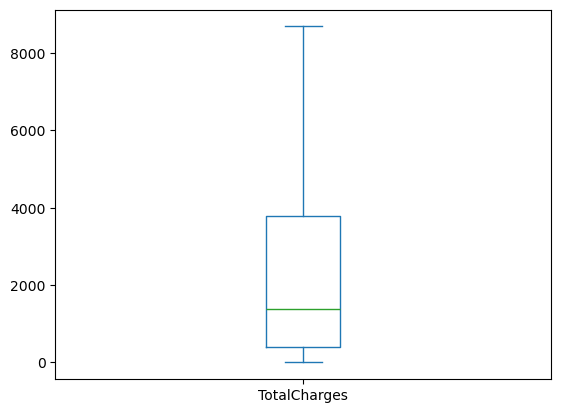

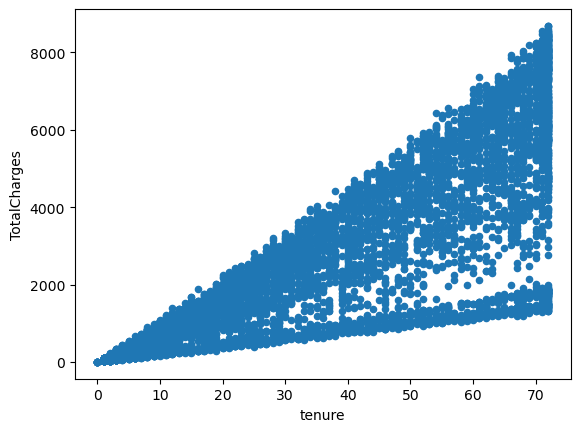

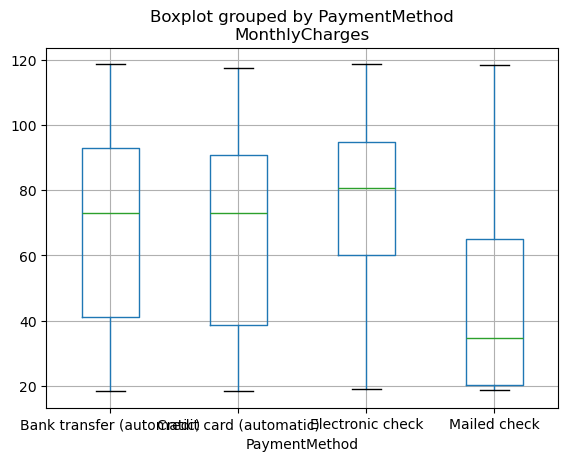

In [9]:
# Simple boxplot of total charges
dataset['TotalCharges'].plot(kind='box')

# Scatter plot, tenure vs. TotalCharges
dataset.plot(kind='scatter', x='tenure', y='TotalCharges')

# Bar graph (runs very slow)
# dataset.plot(kind='bar', x='PaymentMethod', y='MonthlyCharges')

# Generates a grouped boxplot, uses matplotlib through pandas
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
dataset.boxplot(column='MonthlyCharges', by='PaymentMethod')